# Main Goals of Project
- what states and counties are properties located
- plot distribution of tax rates for each county

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from acquire import get_zillow_data

Because property taxes are assessed at the county level, we would like to know what states and counties these are located in.

We'd also like to know the distribution of tax rates for each county.

The data should have the tax amounts and tax value of the home, so it shouldn't be too hard to calculate. Please include in your report to us the distribution of tax rates for each county so that we can see how much they vary within the properties in the county and the rates the bulk of the properties sit around.


In [2]:
zillow = get_zillow_data()

In [3]:
zillow

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,parcelid.1,logerror,transactiondate
0,2061546,11289917,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,11289917,-0.362001,2017-06-23
1,1834372,11705026,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,2016.0,23624.0,543.69,NaN,NaN,6.037232e+13,1772,11705026,-0.146056,2017-06-30
2,1923117,14269464,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,2016.0,445569.0,9819.72,NaN,NaN,6.059064e+13,2028,14269464,0.021085,2017-06-01
3,2121349,11389003,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,2016.0,449000.0,7673.19,NaN,NaN,6.037703e+13,3273,11389003,-0.325393,2017-06-01
4,2093710,11967869,NaN,NaN,NaN,1.0,2.0,NaN,5.0,1.0,...,2016.0,191821.0,3267.47,NaN,NaN,6.037185e+13,3429,11967869,-0.005566,2017-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1324679,14339902,NaN,NaN,NaN,3.0,5.0,NaN,NaN,3.0,...,2016.0,57104.0,5718.72,NaN,NaN,6.059052e+13,53494,14339902,-0.033525,2017-06-30
15032,2963359,13940564,NaN,NaN,NaN,3.0,5.0,NaN,NaN,3.0,...,2016.0,27314.0,1465.88,NaN,NaN,6.059076e+13,53496,13940564,-0.004625,2017-06-30
15033,1948691,12945108,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,2016.0,171711.0,3519.78,NaN,NaN,6.037407e+13,53499,12945108,0.030079,2017-06-30
15034,444575,14214719,NaN,NaN,NaN,3.0,5.0,NaN,NaN,3.0,...,2016.0,407513.0,8065.50,NaN,NaN,6.059076e+13,53500,14214719,-0.017898,2017-06-30


In [4]:
df = zillow[['taxamount', 'taxvaluedollarcnt', 'fips']]

In [5]:
df = df.dropna()

In [6]:
df

,taxamount,taxvaluedollarcnt,fips
0,2319.90,136104.0,6037.0
1,543.69,35606.0,6037.0
2,9819.72,880456.0,6059.0
3,7673.19,614000.0,6037.0
4,3267.47,274237.0,6037.0
...,...,...,...
15031,5718.72,458903.0,6059.0
15032,1465.88,115387.0,6059.0
15033,3519.78,297097.0,6037.0
15034,8065.50,746963.0,6059.0


In [7]:
df['taxrates'] = round((zillow.taxamount / zillow.taxvaluedollarcnt) * 100, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15035 entries, 0 to 15035
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   taxamount          15035 non-null  float64
 1   taxvaluedollarcnt  15035 non-null  float64
 2   fips               15035 non-null  float64
 3   taxrates           15035 non-null  float64
dtypes: float64(4)
memory usage: 587.3 KB


In [9]:
df.groupby('fips').taxrates.describe().T

fips,6037.0,6059.0,6111.0
count,9629.000000,4109.000000,1297.00000
mean,1.417268,1.211957,1.20512
std,0.765991,0.321886,0.82701
min,0.110000,0.170000,0.08000
25%,1.210000,1.060000,1.07000
50%,1.260000,1.150000,1.12000
75%,1.440000,1.250000,1.19000
max,45.290000,10.740000,29.49000


In [17]:
los_angeles = df[df.fips == 6037].taxrates
orange = df[df.fips == 6059].taxrates
ventura = df[df.fips == 6111].taxrates

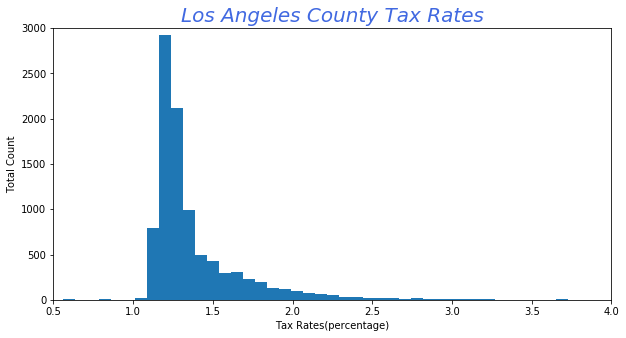

In [89]:
plt.figure(figsize=(10,5))
plt.hist(los_angeles, bins = 600)
plt.xlim(.5, 4)
plt.ylim(0, 3000)
plt.title('Los Angeles County Tax Rates', fontsize = 20, fontstyle='italic', color = "royalblue")
plt.xlabel('Tax Rates(percentage)')
plt.ylabel('Total Count')
plt.show()

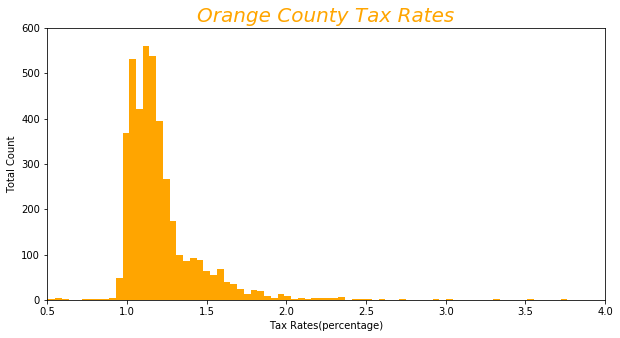

In [88]:
plt.figure(figsize=(10,5))
plt.hist(orange, bins = 250, color = "orange")
plt.xlim(.5, 4)
plt.ylim(0, 600)
plt.title('Orange County Tax Rates', fontsize = 20, fontstyle='italic', color = "orange")
plt.xlabel('Tax Rates(percentage)')
plt.ylabel('Total Count')
plt.show()

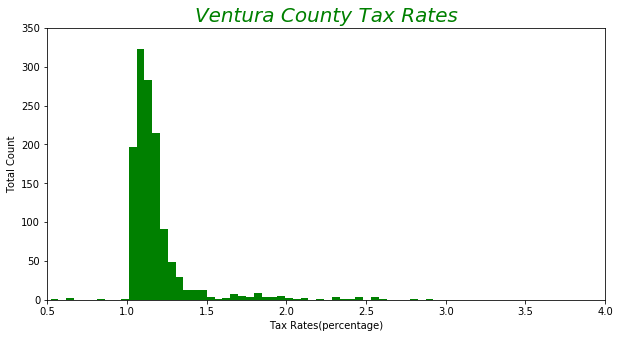

In [87]:
plt.figure(figsize=(10,5))
plt.hist(ventura, bins = 600, color = "green")
plt.xlim(.5, 4)
plt.ylim(0, 350)
plt.title('Ventura County Tax Rates', fontsize = 20, fontstyle='italic', color = "green")
plt.xlabel('Tax Rates(percentage)')
plt.ylabel('Total Count')
plt.show()